In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt

## Raw code of simple linear regressionmean_squared_error

In [63]:
class SimpleLinearRegression:
    
    def __init__(self):
        self.m = None
        self.c = None
        
    def fit(self,X_train,y_train):
        num = 0           
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.c = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.c)       
    
    def predict(self,X_test):
        return self.m * X_test + self.c

In [65]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [95]:
df = pd.read_csv('canada_per_capita_income.csv')

Text(0, 0.5, 'per capita income (US$)')

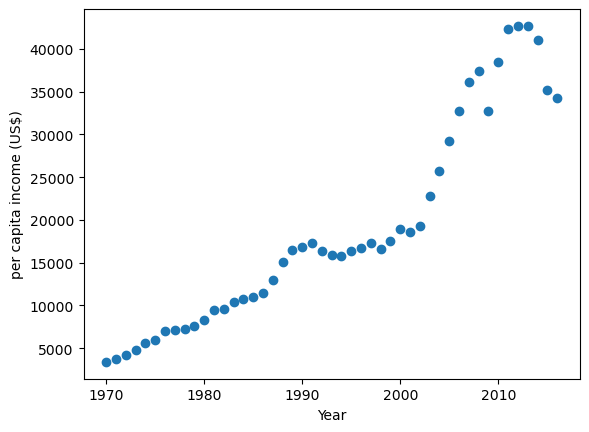

In [128]:
# scatter plot 
plt.scatter(df["year"],df["per capita income (US$)"])
plt.xlabel("Year")
plt.ylabel("per capita income (US$)")

In [96]:
X = df['year']
y = df['per capita income (US$)']

In [98]:
X.head()


0    1970
1    1971
2    1972
3    1973
4    1974
Name: year, dtype: int64

In [99]:
y.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [102]:
slr=SimpleLinearRegression()

In [104]:
slr.fit(X_train.values,y_train.values)

796.936819883258
-1569692.1747126176


In [106]:
y_pred=slr.predict(X_test)

In [108]:
r2_score(y_test,y_pred)

0.915221496166929

In [110]:
mean_absolute_error(y_test,y_pred)

2751.663951445077

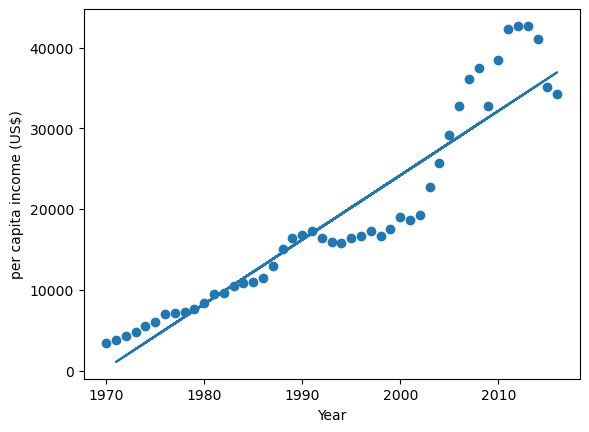

In [131]:
# scatter plot with regression line
plt.scatter(df["year"],df["per capita income (US$)"])
plt.xlabel("Year")
plt.ylabel("per capita income (US$)")
plt.plot(X_train,slr.predict(X_train))

## Comparing with sklearn model

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr=LinearRegression()

In [115]:
lr.fit(X_train.values.reshape(-1,1),y_train)  #converting 1d input into 2d,it's a must for this library

LinearRegression()

In [120]:
lr.coef_

array([796.93681988])

In [121]:
lr.intercept_

-1569692.1747126186

In [117]:
y2_pred=lr.predict(X_test.values.reshape(-1,1))

In [118]:
r2_score(y_test,y_pred)  #same as my custom model

0.915221496166929

In [119]:
mean_absolute_error(y_test,y_pred)  #same as my custom model

2751.663951445077